In [1]:
# -*- coding: utf-8 -*-

# This is a report using the data from IQAASL.
# IQAASL was a project funded by the Swiss Confederation
# It produces a summary of litter survey results for a defined region.
# These charts serve as the models for the development of plagespropres.ch
# The data is gathered by volunteers.
# Please remember all copyrights apply, please give credit when applicable
# The repo is maintained by the community effective January 01, 2022
# There is ample opportunity to contribute, learn and teach
# contact dev@hammerdirt.ch

# Dies ist ein Bericht, der die Daten von IQAASL verwendet.
# IQAASL war ein von der Schweizerischen Eidgenossenschaft finanziertes Projekt.
# Es erstellt eine Zusammenfassung der Ergebnisse der Littering-Umfrage für eine bestimmte Region.
# Diese Grafiken dienten als Vorlage für die Entwicklung von plagespropres.ch.
# Die Daten werden von Freiwilligen gesammelt.
# Bitte denken Sie daran, dass alle Copyrights gelten, bitte geben Sie den Namen an, wenn zutreffend.
# Das Repo wird ab dem 01. Januar 2022 von der Community gepflegt.
# Es gibt reichlich Gelegenheit, etwas beizutragen, zu lernen und zu lehren.
# Kontakt dev@hammerdirt.ch

# Il s'agit d'un rapport utilisant les données de IQAASL.
# IQAASL était un projet financé par la Confédération suisse.
# Il produit un résumé des résultats de l'enquête sur les déchets sauvages pour une région définie.
# Ces tableaux ont servi de modèles pour le développement de plagespropres.ch
# Les données sont recueillies par des bénévoles.
# N'oubliez pas que tous les droits d'auteur s'appliquent, veuillez indiquer le crédit lorsque cela est possible.
# Le dépôt est maintenu par la communauté à partir du 1er janvier 2022.
# Il y a de nombreuses possibilités de contribuer, d'apprendre et d'enseigner.
# contact dev@hammerdirt.ch
# sys, file and nav packages:
import datetime as dt

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# home brew utitilties
import resources.chart_kwargs as ck
import resources.sr_ut as sut

# images and display
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display
# set some parameters:
start_date = "2020-03-01"
end_date ="2021-05-31"
start_end = [start_date, end_date]
a_fail_rate = 50
unit_label = "p/100m"
a_color = "dodgerblue"

# colors for gradients
cmap2 = ck.cmap2
colors_palette = ck.colors_palette

# set the maps
bassin_map = "resources/maps/leman_scaled.jpeg"

# top level aggregation
top = "All survey areas"

# define the feature level and components
this_feature = {'slug':'lac-leman', 'name':"Lac Léman", 'level':'water_name_slug'}
this_level = 'city'
this_bassin = "rhone"
bassin_label = "Aa survey area"

lakes_of_interest = ['bielersee']

# explanatory variables:
luse_exp = ["% buildings", "% recreation", "% agg", "% woods", "streets km", "intersects"]

# common aggregations
agg_pcs_quantity = {unit_label:"sum", "quantity":"sum"}
agg_pcs_median = {unit_label:"median", "quantity":"sum"}

# aggregation of dimensional data
agg_dims = {"total_w":"sum", "mac_plast_w":"sum", "area":"sum", "length":"sum"}


# columns needed
use_these_cols = ["loc_date" ,
                  "% to buildings",
                  "% to trans", 
                  "% to recreation",
                  "% to agg",
                  "% to woods",
                  "population",
                  this_level,
                  "streets km",
                  "intersects",
                  "length",
                  "groupname",
                  "code"
                 ]

# get your data:
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")
dfDims = pd.read_csv("resources/corrected_dims.csv")

# set the index of the beach data to location slug
dfBeaches.set_index("slug", inplace=True)

# make a map to city names
city_map = dfBeaches.city

# map water_name_slug to water_name
wname_wname = dfBeaches[["water_name_slug","water_name"]].reset_index(drop=True).drop_duplicates().set_index("water_name_slug")

dfCodes.set_index("code", inplace=True)

codes_to_change = [
    ["G74", "description", "Insulation foams"],
    ["G940", "description", "Foamed EVA for crafts and sports"],
    ["G96", "description", "Sanitary-pads/tampons, applicators"],
    ["G178", "description", "Metal bottle caps and lids"],
    ["G82", "description", "Expanded foams 2.5cm - 50cm"],
    ["G81", "description", "Expanded foams .5cm - 2.5cm"],
    ["G117", "description", "Expanded foams < 5mm"],
    ["G75", "description", "Plastic/foamed polystyrene 0 - 2.5cm"],
    ["G76", "description", "Plastic/foamed polystyrene 2.5cm - 50cm"],
    ["G24", "description", "Plastic lid rings"],
    ["G33", "description", "Lids for togo drinks plastic"],
    ["G3", "description", "Plastic bags, carier bags"],
    ["G204", "description", "Bricks, pipes not plastic"],
    ["G904", "description", "Plastic fireworks"],
    ["G211", "description", "Swabs, bandaging, medical"],
]

for x in codes_to_change:
    dfCodes = sut.shorten_the_value(x, dfCodes)

# the surveyor designated the object as aluminum instead of metal
dfCodes.loc["G708", "material"] = "Metal"

# make a map to the code descriptions
code_description_map = dfCodes.description

# make a map to the code materials
code_material_map = dfCodes.material

(bielersee)=
# Bielersee

*Map of survey locations March 2020 - May 2021*

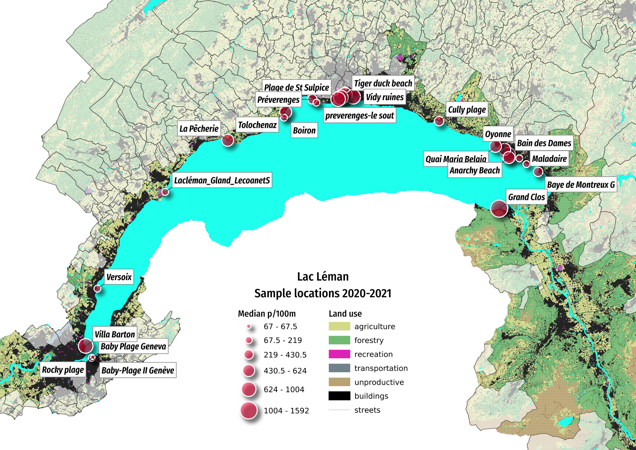

In [2]:
sut.display_image_ipython(bassin_map, thumb=(800,450))

## Sample locations

In [3]:
# this is the data before the expanded foams and fragmented plastics are aggregated to Gfrags and Gfoams
before_agg = pd.read_csv("resources/checked_before_agg_sdata_eos_2020_21.csv")

# this is the aggregated survey data that is being used
# a_data is all the data in the survey period
a_data = pd.read_csv(F"resources/checked_sdata_eos_2020_21.csv")
a_data["date"] = pd.to_datetime(a_data.date)

a_data.rename(columns={"% to agg":"% ag", "% to recreation": "% recreation", "% to woods":"% woods", "% to buildings":"% buildings"}, inplace=True)
luse_exp = ["% buildings", "% recreation", "% ag", "% woods", "streets km", "intersects"]

fd = sut.feature_data(a_data, this_feature["level"], these_features=[this_feature["slug"]])

# cumulative statistics for each code
code_totals = sut.the_aggregated_object_values(fd, agg=agg_pcs_median, description_map=code_description_map, material_map=code_material_map)    

# daily survey totals
dt_all = fd.groupby(["loc_date","location",this_level, "date"], as_index=False).agg(agg_pcs_quantity )

# the materials table
fd_mat_totals = sut.the_ratio_object_to_total(code_totals)

# summary statistics, nsamples, nmunicipalities, names of citys, population
t = sut.make_table_values(fd, col_nunique=["location", "loc_date", "city"], col_sum=["quantity"], col_median=[])

# make a map to the population values for each survey location/city
fd_pop_map = dfBeaches.loc[fd.location.unique()][["city", "population"]].copy()
fd_pop_map.drop_duplicates(inplace=True)

# update t with the population data
t.update(sut.make_table_values(fd_pop_map, col_nunique=["city"], col_sum=["population"], col_median=[]))

# update t with the list of locations from fd
t.update({"locations":fd.location.unique()})

# join the strings into comma separated list
obj_string = "{:,}".format(t["quantity"])
surv_string = "{:,}".format(t["loc_date"])
pop_string = "{:,}".format(int(t["population"]))

# make strings
date_quantity_context = F"For the period between {start_date[:-3]} and {end_date[:-3]}, a total of {obj_string } objects were removed and identified over the course of {surv_string} surveys."
geo_context = F"The {this_feature['name']} results include {t['location']} different locations in {t['city']} different municipalities with a combined population of approximately {pop_string}."
munis_joined = ", ".join(sorted(fd_pop_map["city"]))

# put that all together:
lake_string = F"""
{date_quantity_context} {geo_context }

*{this_feature["name"]} municipalities:*\n\n>{munis_joined}
"""
md(lake_string)


For the period between 2020-03 and 2021-05, a total of 27,462 objects were removed and identified over the course of 98 surveys. The Lac Léman results include 24 different locations in 13 different municipalities with a combined population of approximately 443,854.

*Lac Léman municipalities:*

>Allaman, Bourg-en-Lavaux, Genève, Gland, La Tour-de-Peilz, Lausanne, Montreux, Préverenges, Saint-Gingolph, Saint-Sulpice (VD), Tolochenaz, Versoix, Vevey


### Cumulative totals by municipality

In [4]:
dims_parameters = dict(this_level=this_level, 
                       locations=fd.location.unique(), 
                       start_end=start_end, 
                       city_map=city_map, 
                       agg_dims=agg_dims)

dims_table = sut.gather_dimensional_data(dfDims, **dims_parameters)

# a map of total quantity for each component
q_map = fd.groupby(this_level).quantity.sum()

# assgin the quantity and sample numbers to the dims table
for name in dims_table.index:
    dims_table.loc[name, "samples"] = fd[fd[this_level] == name].loc_date.nunique()
    dims_table.loc[name, "quantity"] = q_map[name]

# make a total column for the top feature data, the sum of all the components
dims_table.loc[this_feature["name"]]= dims_table.sum(numeric_only=True, axis=0)

# change the column names to user friendly syle
dims_table.rename(columns=sut.update_dictionary(sut.dims_table_columns), inplace=True)

# format the numercial data
dims_table.sort_values(by=["items"], ascending=False, inplace=True)

# change to formatted strings
dims_table["plastic kg"] = dims_table["plastic kg"]/1000
dims_table[["m²", "meters", "samples", "items"]] = dims_table[["m²", "meters", "samples", "items"]].applymap(lambda x: "{:,}".format(int(x)))
dims_table[["plastic kg", "total kg"]] = dims_table[["plastic kg", "total kg"]].applymap(lambda x: "{:.2f}".format(x))

# figure caption
agg_caption = F"""
*__Below:__ The cumulative weights and measures for {this_feature["name"]} and municipalities*
"""
md(agg_caption)


*__Below:__ The cumulative weights and measures for Lac Léman and municipalities*


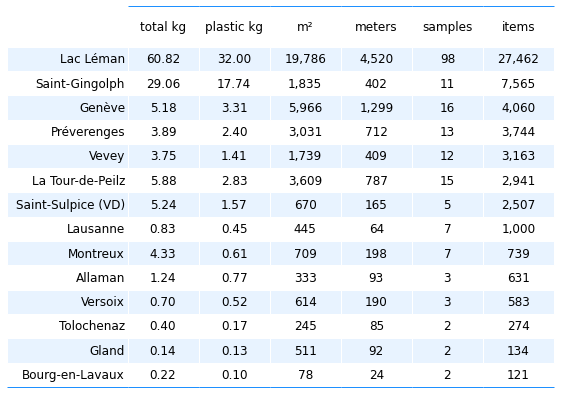

In [5]:
# make table
data = dims_table.reset_index()
colLabels = data.columns

fig, ax = plt.subplots(figsize=(len(colLabels)*1.4,len(data)*.5))

sut.hide_spines_ticks_grids(ax)
table_one = sut.make_a_table(ax, data.values, colLabels=colLabels, a_color=a_color)
table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Distribution of Survey results

In [6]:
# the feature surveys to chart
fd_dindex = dt_all.set_index("date")

# all the other surveys
ots = dict(level_to_exclude=this_feature["level"], components_to_exclude=fd[this_feature["level"]].unique())
dts_date = sut.the_other_surveys(a_data, **ots)

# group the outher surveys by date and total pcs_m
ots_params = dict(agg_this = {unit_label:"sum"}, these_columns = ["loc_date","date"])
dts_date = sut.group_these_columns(dts_date, **ots_params)

# get the monthly or quarterly results for the feature
resample_plot, rate = sut.quarterly_or_monthly_values(fd_dindex , this_feature["name"], vals=unit_label, quarterly=["ticino"])    

# scale the chart as needed to accomodate for extreme values
y_lim = 98
y_limit = np.percentile(dts_date[unit_label], y_lim)

# label for the chart that alerts to the scale
not_included = F"Values greater than {round(y_limit, 1)}{unit_label} not shown."

# figure caption
chart_notes = F"""
*__Left:__ {this_feature['name']}, {start_date[:7]} through {end_date[:7]}, n={t["loc_date"]}. {not_included} __Right:__ {this_feature['name']} empirical cumulative distribution of survey results.*
"""
md(chart_notes )


*__Left:__ Lac Léman, 2020-03 through 2021-05, n=98. Values greater than 1054.8p/100m not shown. __Right:__ Lac Léman empirical cumulative distribution of survey results.*


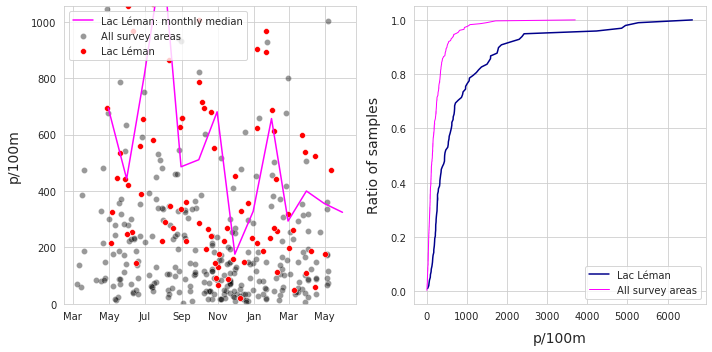

In [7]:
# months locator, can be confusing
# https://matplotlib.org/stable/api/dates_api.html
# months = mdates.MonthLocator(interval=1)
months_fmt = mdates.DateFormatter("%b")
days = mdates.DayLocator(interval=7)
sns.set_style("whitegrid")

fig, axs = plt.subplots(1,2, figsize=(10,5))

# the survey totals by day
ax = axs[0]

# feature surveys
sns.scatterplot(data=dts_date, x=dts_date.index, y=unit_label, label=top, color="black", alpha=0.4,  ax=ax)
# all other surveys
sns.scatterplot(data=fd_dindex, x=fd_dindex.index, y=unit_label, label=this_feature["name"], color="red", s=34, ec="white", ax=ax)

# monthly or quaterly plot
sns.lineplot(data=resample_plot, x=resample_plot.index, y=resample_plot, label=F"{this_feature['name']}: {rate} median", color="magenta", ax=ax)

ax.set_ylim(0,y_limit )
ax.set_ylabel(unit_label, **ck.xlab_k14)

ax.set_xlabel("")
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_major_formatter(months_fmt)
ax.legend()

# the cumlative distributions:
axtwo = axs[1]

# the feature of interest
feature_ecd = ECDF(dt_all[unit_label].values)    
sns.lineplot(x=feature_ecd.x, y=feature_ecd.y, color="darkblue", ax=axtwo, label=this_feature["name"])

# the other features
other_features = ECDF(dts_date[unit_label].values)
sns.lineplot(x=other_features.x, y=other_features.y, color="magenta", label=top, linewidth=1, ax=axtwo)

axtwo.set_xlabel(unit_label, **ck.xlab_k14)
axtwo.set_ylabel("Ratio of samples", **ck.xlab_k14)

plt.tight_layout()
plt.show()

### Summary data and material types

In [8]:
# figure caption
summary_of_survey_totals = F"""
*__Left:__ {this_feature['name']} summary of survey totals. __Right:__ {this_feature['name']} material type and percent of total*
"""
md(summary_of_survey_totals)


*__Left:__ Lac Léman summary of survey totals. __Right:__ Lac Léman material type and percent of total*


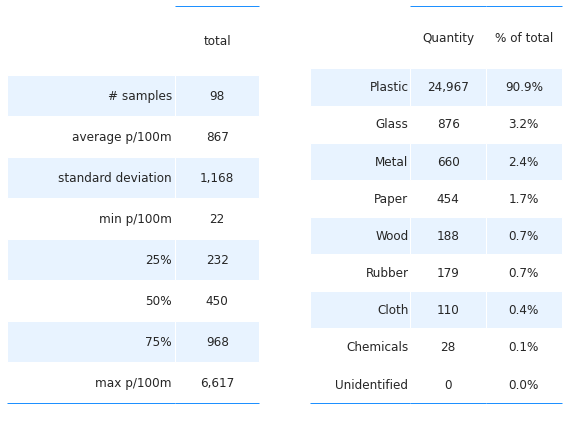

In [9]:
# get the basic statistics from pd.describe
cs = dt_all[unit_label].describe().round(2)

# change the names
csx = sut.change_series_index_labels(cs, sut.create_summary_table_index(unit_label, lang="EN"))

combined_summary = sut.fmt_combined_summary(csx, nf=[])

fd_mat_totals = sut.fmt_pct_of_total(fd_mat_totals)
fd_mat_totals = sut.make_string_format(fd_mat_totals)

# applly new column names for printing
cols_to_use = {"material":"Material","quantity":"Quantity", "% of total":"% of total"}
fd_mat_t = fd_mat_totals[cols_to_use.keys()].values

# make tables
fig, axs = plt.subplots(1,2, figsize=(8,6))

# summary table
# names for the table columns
a_col = [this_feature["name"], "total"]

axone = axs[0]
sut.hide_spines_ticks_grids(axone)

table_two = sut.make_a_table(axone, combined_summary,  colLabels=a_col, colWidths=[.5,.25,.25],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_two.get_celld()[(0,0)].get_text().set_text(" ")

# material table
axtwo = axs[1]
axtwo.set_xlabel(" ")
sut.hide_spines_ticks_grids(axtwo)

table_three = sut.make_a_table(axtwo, fd_mat_t,  colLabels=list(cols_to_use.values()), colWidths=[.4, .3,.3],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_three.get_celld()[(0,0)].get_text().set_text(" ")

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

## The most common objects

The most common objects are the **ten most abundant by quantity AND/OR objects identified in at least 50% of all surveys.**

In [10]:
# the top ten by quantity
most_abundant = code_totals.sort_values(by="quantity", ascending=False)[:10]

# the most common
most_common = code_totals[code_totals["fail rate"] >= a_fail_rate].sort_values(by="quantity", ascending=False)

# merge with most_common and drop duplicates
m_common = pd.concat([most_abundant, most_common]).drop_duplicates()

# get percent of total
m_common_percent_of_total = m_common.quantity.sum()/code_totals.quantity.sum()

# figure caption
rb_string = F"""
*__Below:__ {this_feature['name']} most common objects: fail rate >/= {a_fail_rate}%  and/or top ten by quantity. Combined, the most abundant objects represent {int(m_common_percent_of_total*100)}% of all objects found. 
Note : {unit_label} = median survey value.*
"""
md(rb_string)


*__Below:__ Lac Léman most common objects: fail rate >/= 50%  and/or top ten by quantity. Combined, the most abundant objects represent 82% of all objects found. 
Note : p/100m = median survey value.*


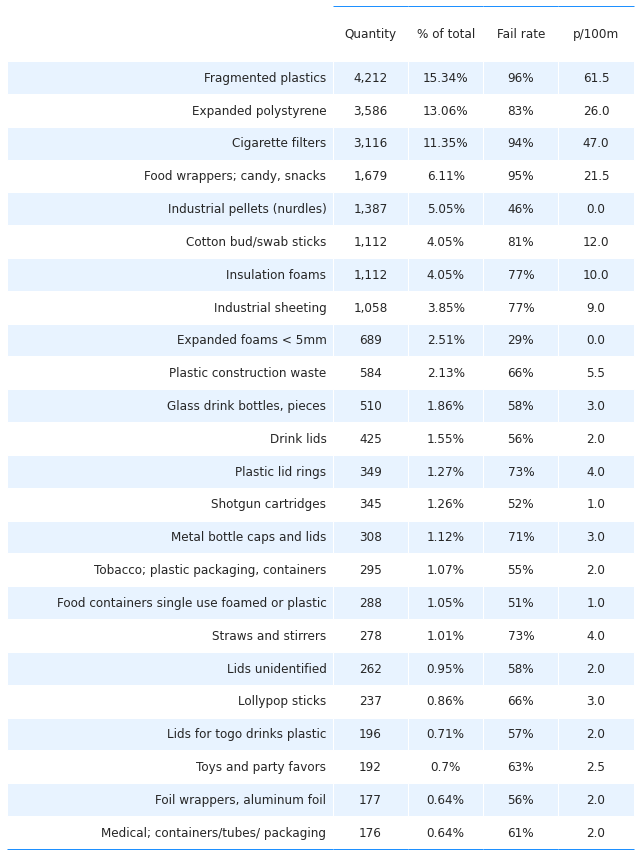

In [11]:
# format values for table
m_common["item"] = m_common.index.map(lambda x: code_description_map.loc[x])
m_common["% of total"] = m_common["% of total"].map(lambda x: F"{x}%")
m_common["quantity"] = m_common.quantity.map(lambda x: "{:,}".format(x))
m_common["fail rate"] = m_common["fail rate"].map(lambda x: F"{x}%")
m_common[unit_label] = m_common[unit_label].map(lambda x: F"{round(x,1)}")

# final table data
cols_to_use = {"item":"Item","quantity":"Quantity", "% of total":"% of total", "fail rate":"Fail rate", unit_label:unit_label}
all_survey_areas = m_common[cols_to_use.keys()].values

fig, axs = plt.subplots(figsize=(len(cols_to_use)*1.8,len(all_survey_areas)*.5))

sut.hide_spines_ticks_grids(axs)

table_four = sut.make_a_table(axs, all_survey_areas,  colLabels=list(cols_to_use.values()), colWidths=[.52, .12,.12,.12, .12],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_four.get_celld()[(0,0)].get_text().set_text(" ")

plt.tight_layout()
plt.show()

plt.close()

### Most common objects results by municipality

In [12]:
rb_string = F"""
*__Below:__ {this_feature['name']} most common objects: median {unit_label}*
"""
md(rb_string)


*__Below:__ Lac Léman most common objects: median p/100m*


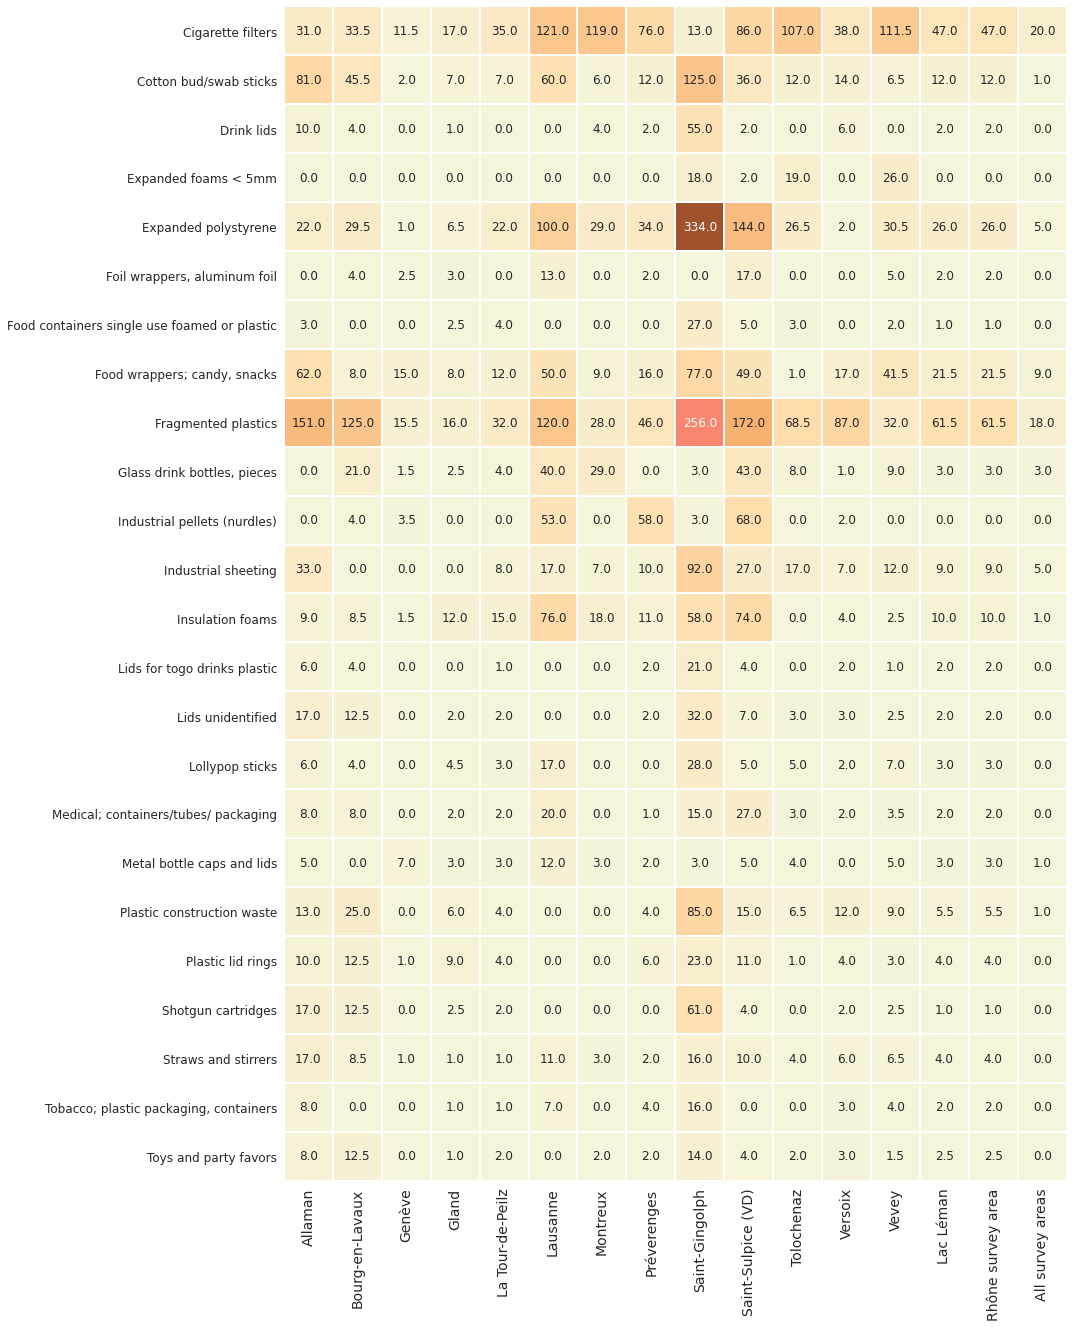

In [13]:
# aggregated survey totals for the most common codes for all the water features
m_common_st = fd[fd.code.isin(m_common.index)].groupby([this_level, "loc_date","code"], as_index=False).agg(agg_pcs_quantity)
m_common_ft = m_common_st.groupby([this_level, "code"], as_index=False)[unit_label].median()

# # proper name of water feature for display
# m_common_ft["f_name"] = m_common_ft[this_level].map(lambda x: comp_labels[x])

# map the desctiption to the code
m_common_ft["item"] = m_common_ft.code.map(lambda x: code_description_map.loc[x])

# pivot that
m_c_p = m_common_ft[["item", this_level, unit_label]].pivot(columns=this_level, index="item")

# quash the hierarchal column index
m_c_p.columns = m_c_p.columns.get_level_values(1)

# the aggregated totals for the lake
c = sut.aggregate_to_group_name(fd[fd.code.isin(m_common.index)], column="code", name=this_feature["name"], val="med")
m_c_p[this_feature["name"]]= sut.change_series_index_labels(c, {x:code_description_map.loc[x] for x in c.index})

# the survey area
c = sut.aggregate_to_group_name(fd[fd.code.isin(m_common.index)], column="code", name=this_bassin, val="med")
m_c_p[bassin_label]= sut.change_series_index_labels(c, {x:code_description_map.loc[x] for x in c.index})

# the aggregated totals of all the data
c = sut.aggregate_to_group_name(a_data[(a_data.code.isin(m_common.index))], column="code", name=top, val="med")
m_c_p[top] = sut.change_series_index_labels(c, {x:code_description_map.loc[x] for x in c.index})

# chart that
fig, ax  = plt.subplots(figsize=(len(m_c_p.columns)*.9,len(m_c_p)*.9))
axone = ax

sns.heatmap(m_c_p, ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, fmt=".1f", square=True, cbar=False, linewidth=.1, linecolor="white")
axone.set_xlabel("")
axone.set_ylabel("")
axone.tick_params(labelsize=14, which="both", axis="x")
axone.tick_params(labelsize=12, which="both", axis="y")

plt.setp(axone.get_xticklabels(), rotation=90)

plt.show()
plt.close()

### Most common objects monthly average

In [14]:
# collect the survey results of the most common objects
m_common_m = fd[(fd.code.isin(m_common.index))].groupby(["loc_date", "date", "code", "groupname"], as_index=False).agg(agg_pcs_quantity)
m_common_m.set_index("date", inplace=True)

# set the order of the chart, group the codes by groupname columns
an_order = m_common_m.groupby(["code", "groupname"], as_index=False).quantity.sum().sort_values(by="groupname")["code"].values

# a manager dict for the monthly results of each code
mgr = {}

# get the monhtly results for each code:
for a_group in an_order:
    # resample by month
    a_plot = m_common_m[(m_common_m.code==a_group)][unit_label].resample("M").mean().fillna(0)
    this_group = {a_group:a_plot}
    mgr.update(this_group)

monthly_mc = F"""
*__Below:__ {this_feature['name']}, monthly average survey result {unit_label}. Detail of the most common objects*
"""
md(monthly_mc)


*__Below:__ Lac Léman, monthly average survey result p/100m. Detail of the most common objects*


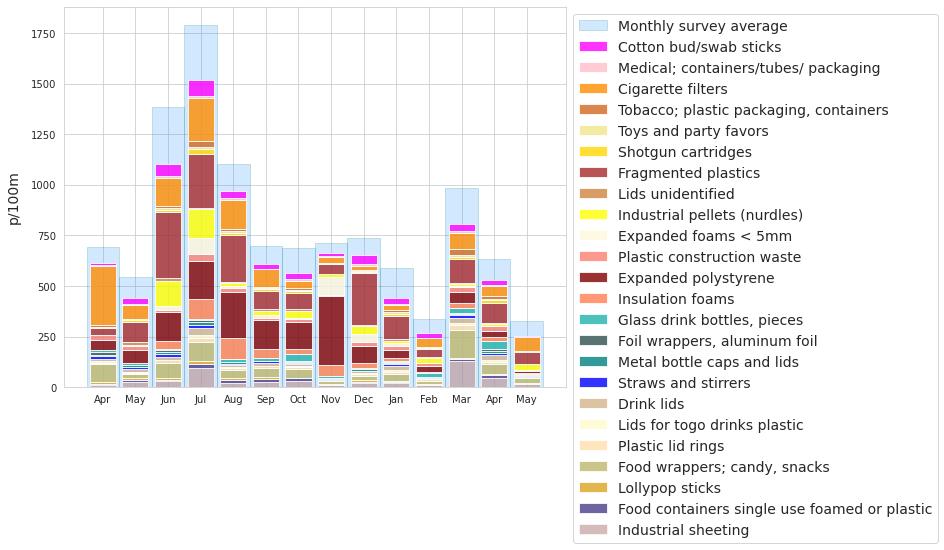

In [15]:
# convenience function to lable x axis
def new_month(x):
    if x <= 11:
        this_month = x
    else:
        this_month=x-12    
    return this_month
months={
    0:'Jan',
    1:'Feb',
    2:'Mar',
    3:'Apr',
    4:'May',
    5:'Jun',
    6:'Jul',
    7:'Aug',
    8:'Sep',
    9:'Oct',
    10:'Nov',
    11:'Dec'
}

fig, ax = plt.subplots(figsize=(9,7))

# define a bottom
bottom = [0]*len(mgr["G27"])

# the monhtly survey average for all objects and locations
monthly_fd = fd.groupby(["loc_date", "date"], as_index=False).agg(agg_pcs_quantity)
monthly_fd.set_index("date", inplace=True)
m_fd = monthly_fd[unit_label].resample("M").mean().fillna(0)

# define the xaxis
this_x = [i for i,x in  enumerate(m_fd.index)]

# plot the monthly total survey average
ax.bar(this_x, m_fd.to_numpy(), color=a_color, alpha=0.2, linewidth=1, edgecolor="teal", width=1, label="Monthly survey average") 

# plot the monthly survey average of the most common objects
for i, a_group in enumerate(an_order): 
    
    # define the axis
    this_x = [i for i,x in  enumerate(mgr[a_group].index)]
    
    # collect the month
    this_month = [x.month for i,x in enumerate(mgr[a_group].index)]
    
    # if i == 0 laydown the first bars
    if i == 0:
        ax.bar(this_x, mgr[a_group].to_numpy(), label=a_group, color=colors_palette[a_group], linewidth=1, alpha=0.6 ) 
    # else use the previous results to define the bottom
    else:
        bottom += mgr[an_order[i-1]].to_numpy()        
        ax.bar(this_x, mgr[a_group].to_numpy(), bottom=bottom, label=a_group, color=colors_palette[a_group], linewidth=1, alpha=0.8)
        
# collect the handles and labels from the legend
handles, labels = ax.get_legend_handles_labels()

# set the location of the x ticks
ax.xaxis.set_major_locator(ticker.FixedLocator([i for i in np.arange(len(this_x))]))

#label the xticks by month
axisticks = ax.get_xticks()
labelsx = [months[new_month(x-1)] for x in  this_month]
plt.xticks(ticks=axisticks, labels=labelsx)

ax.set_ylabel(unit_label, **ck.xlab_k14)

# make the legend
# swap out codes for descriptions
new_labels = [code_description_map.loc[x] for x in labels[1:]]
new_labels = new_labels[::-1]

# insert a label for the monthly average
new_labels.insert(0,"Monthly survey average")
handles = [handles[0], *handles[1:][::-1]]
    
plt.legend(handles=handles, labels=new_labels, bbox_to_anchor=(1, 1), loc="upper left",  fontsize=14)    
plt.show()

## Utility of the objects found

The utility type is based on the utilization of the object prior to it being discarded or object description if the original use is undetermined. Identified objects are classified into one of 260 predefined categories. The categories are grouped according to utilization or item description. 

*  **wastewater**: items released from water treatment plants includes items likely toilet flushed   
*  **micro plastics (< 5mm)**: fragmented plastics and pre-production plastic resins 
*  **infrastructure**: items related to construction and maintenance of buildings, roads and water/power supplies 
*  **food and drink**: all materials related to consuming food and drink
*  **agriculture**: primarily industrial sheeting i.e., mulch and row covers, greenhouses, soil fumigation, bale wraps. Includes hard plastics for agricultural fencing, flowerpots etc. 
*  **tobacco**: primarily cigarette filters, includes all smoking related material 
*  **recreation**: objects related to sports and leisure i.e., fishing, hunting, hiking etc.
*  **packaging non food and drink**: packaging material not identified as food, drink nor tobacco related 
*  **plastic fragments**: plastic pieces of undetermined origin or use 
*  **personal items**: accessories, hygiene and clothing related 

See the annex for the complete list of objects identified, includes descriptions and group classification. The section [Code groups](codegroups) describes each code group in detail and provides a comprehensive list of all objects in a group.

In [16]:
cg_poft = F"""
<br></br>
*__Below:__ {this_feature['name']} utility of objects found % of total by municipality. Fragmented objects with no clear identification remain classified by size:*
"""
md(cg_poft)


<br></br>
*__Below:__ Lac Léman utility of objects found % of total by municipality. Fragmented objects with no clear identification remain classified by size:*


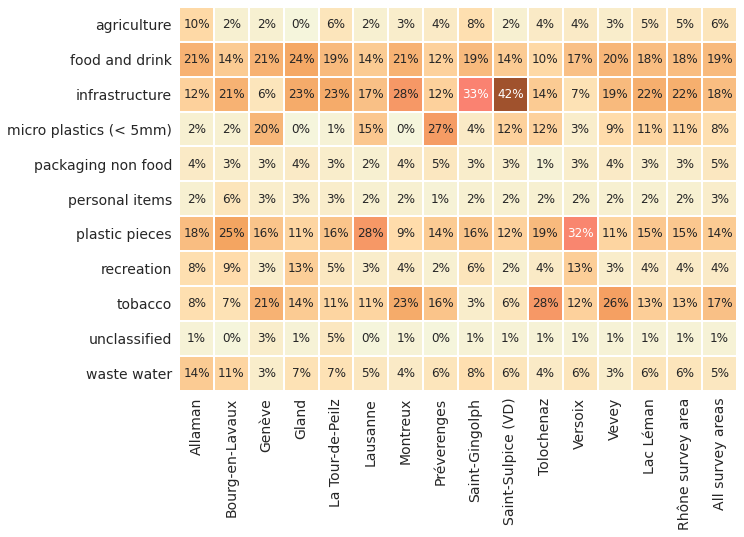

In [17]:
# code groups resluts aggregated by survey
groups = ["loc_date","groupname"]
cg_t = fd.groupby([this_level,*groups], as_index=False).agg(agg_pcs_quantity)

# the total per water feature
cg_tq = cg_t.groupby(this_level).quantity.sum()

# get the fail rates for each group per survey
cg_t["fail"]=False
cg_t["fail"] = cg_t.quantity.where(lambda x: x == 0, True)

# aggregate all that for each municipality
agg_this = {unit_label:"median", "quantity":"sum", "fail":"sum", "loc_date":"nunique"} 
cg_t = cg_t.groupby([this_level, "groupname"], as_index=False).agg(agg_this)

# assign survey area total to each record
for a_feature in cg_tq.index:
    cg_t.loc[cg_t[this_level] == a_feature, "f_total"] = cg_tq.loc[a_feature]

# get the percent of total for each group for each survey area
cg_t["pt"] = (cg_t.quantity/cg_t.f_total).round(2)

# pivot that
data_table = cg_t.pivot(columns=this_level, index="groupname", values="pt")

data_table[this_feature["name"]] = sut.aggregate_to_group_name(fd, unit_label=unit_label, column="groupname", name=this_feature["name"], val="pt")

# repeat for the survey area
data_table[bassin_label] = sut.aggregate_to_group_name(fd, unit_label=unit_label, column="groupname", name=bassin_label, val="pt")

# repeat for all the data
data_table[top] = sut.aggregate_to_group_name(a_data, unit_label=unit_label, column="groupname", name=top, val="pt")

data = data_table
# data.rename(columns={x:wname_wname.loc[x][0] for x in data.columns[:-2]}, inplace=True)

fig, ax = plt.subplots(figsize=(10,10))

axone = ax
sns.heatmap(data , ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, cbar=False, fmt=".0%", linewidth=.1, square=True, linecolor="white")

axone.set_ylabel("")
axone.set_xlabel("")
axone.tick_params(labelsize=14, which="both", axis="both", labeltop=False, labelbottom=True)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

In [18]:
cg_medpcm = F"""
<br></br>
*__Below:__ {this_feature['name']} utility of objects found median {unit_label}. Fragmented objects with no clear identification remain classified by size:*
"""
md(cg_medpcm)


<br></br>
*__Below:__ Lac Léman utility of objects found median p/100m. Fragmented objects with no clear identification remain classified by size:*


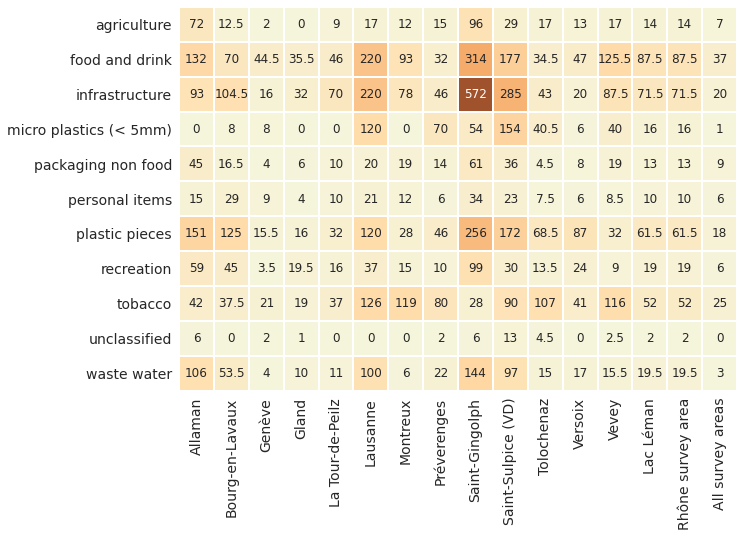

In [19]:
# median p/50m of all the water features
data_table = cg_t.pivot(columns=this_level, index="groupname", values=unit_label)

# the survey area columns
data_table[this_feature["name"]] = sut.aggregate_to_group_name(fd, unit_label=unit_label, column="groupname", name=this_feature["name"], val="med")

# the survey area columns
data_table[bassin_label] = sut.aggregate_to_group_name(fd, unit_label=unit_label, column="groupname", name=bassin_label, val="med")

# column for all the surveys
data_table[top] = sut.aggregate_to_group_name(a_data, unit_label=unit_label, column="groupname", name=top, val="med")

# merge with data_table
data = data_table

fig, ax = plt.subplots(figsize=(10,10))

axone = ax
sns.heatmap(data , ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, fmt="g", cbar=False, linewidth=.1, square=True, linecolor="white")

axone.set_xlabel("")
axone.set_ylabel("")
axone.tick_params(labelsize=14, which="both", axis="both", labeltop=False, labelbottom=True)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

## Annex

### Fragmented foams and plastics by size

The table below contains the “Gfoam” and “Gfrags” components grouped for analysis. Objects labeled expanded foams are grouped as Gfoam and includes all expanded polystyrene foamed plastics > 0.5 cm.  Plastic pieces and objects made of combined plastic and foamed plastic materials > 0.5 cm. are grouped for analysis as Gfrags.

In [20]:
frag_foams = F"""
*__Below:__ {this_feature['name']} fragmented foams and plastics by size group.* 
"""
md(frag_foams)


*__Below:__ Lac Léman fragmented foams and plastics by size group.* 


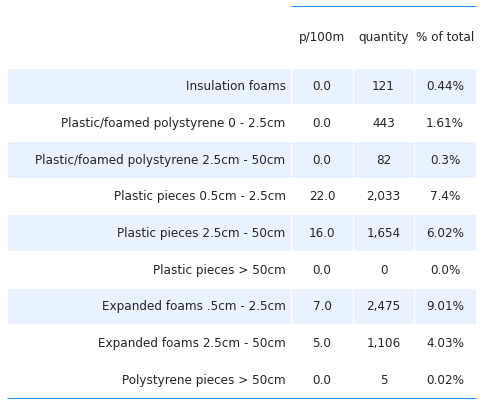

In [21]:
# collect the data before aggregating foams for all locations in the survey area
# the codes for the foams
some_foams = ["G81", "G82", "G83", "G74"]

# the codes for the fragmented plastics
some_frag_plas = list(before_agg[before_agg.groupname == "plastic pieces"].code.unique())

# aggregate all the codes by loc_date and get the total quantity and the median pcs/m
fd_frags_foams = before_agg[(before_agg.code.isin([*some_frag_plas, *some_foams]))&(before_agg.location.isin(t["locations"]))].groupby(["loc_date","code"], as_index=False).agg(agg_pcs_quantity)
fd_frags_foams = fd_frags_foams.groupby("code").agg({unit_label:"median", "quantity":"sum"})

# add code description and format for printing
fd_frags_foams["item"] = fd_frags_foams.index.map(lambda x: code_description_map.loc[x])
fd_frags_foams["% of total"] = (fd_frags_foams.quantity/fd.quantity.sum()*100).round(2)
fd_frags_foams["% of total"] = fd_frags_foams["% of total"].map(lambda x: F"{x}%")
fd_frags_foams["quantity"] = fd_frags_foams["quantity"].map(lambda x: F"{x:,}")

# table data
data = fd_frags_foams[["item", unit_label, "quantity", "% of total"]]

fig, axs = plt.subplots(figsize=(len(data.columns)*2.1,len(data)*.8))
sut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(data.values,  colLabels=data.columns, colWidths=[.6, .13, .13, .13], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,data.values,data.columns, a_color, s_et_bottom_row=True)

a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Organizations

1. Hammerdirt
2. Precious Plastic Leman

__The survey locations__

In [22]:
# display the survey locations

disp_columns = ["latitude", "longitude", "city"]
disp_beaches = dfBeaches.loc[t["locations"]][disp_columns]
disp_beaches.reset_index(inplace=True)
disp_beaches.rename(columns={"slug":"location"}, inplace=True)
disp_beaches.set_index("location", inplace=True, drop=True)

disp_beaches

,latitude,longitude,city
location,,,
maladaire,46.446296,6.876960,La Tour-de-Peilz
preverenges,46.512690,6.527657,Préverenges
vidy-ruines,46.516221,6.596279,Lausanne
baby-plage-geneva,46.208558,6.162923,Genève
grand-clos,46.387746,6.843686,Saint-Gingolph
quai-maria-belgia,46.460156,6.836718,Vevey
anarchy-beach,46.447216,6.859612,La Tour-de-Peilz
cully-plage,46.488887,6.741396,Bourg-en-Lavaux
preverenges-le-sout,46.508905,6.534526,Préverenges


### Inventory of items

In [23]:
pd.set_option("display.max_rows", None)

complete_inventory = code_totals[code_totals.quantity>0][["item", "groupname", "quantity","% of total","fail rate"]]
complete_inventory.sort_values(by="quantity", ascending=False)

,item,groupname,quantity,% of total,fail rate
code,,,,,
Gfrags,Fragmented plastics,plastic pieces,4212,15.34,96
Gfoam,Expanded polystyrene,infrastructure,3586,13.06,83
G27,Cigarette filters,tobacco,3116,11.35,94
G30,"Food wrappers; candy, snacks",food and drink,1679,6.11,95
G112,Industrial pellets (nurdles),micro plastics (< 5mm),1387,5.05,46
G95,Cotton bud/swab sticks,waste water,1112,4.05,81
G74,Insulation foams,infrastructure,1112,4.05,77
G67,Industrial sheeting,agriculture,1058,3.85,77
G117,Expanded foams < 5mm,micro plastics (< 5mm),689,2.51,29
